In [ ]:
#Una entidad bancaria contrata una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interezados o nó enadquirir un certificado de depósito a término fijo.
#¿Qué perfil tienen los clientes con mayor potencial de conversion?


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ruta = "/content/drive/MyDrive/google colab/dataset_banco.csv"
data = pd.read_csv(ruta)

In [ ]:
print(data.shape)

(45215, 17)


In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


1. - Datos Faltantes en alguna celda
2. - Columnas irrelevantes- Hobies del Usuario, Comida favorita.
3. - Registros repetido. Dos o más celdas con la misma informacion
4. - Valores extremos (outliers). Edades de 200 años en adelante.
5. - Errores tipográficos en el caso de variables caregóricas.

In [ ]:
data.dropna(inplace=True)  # elimina fila completa con celdas vacías
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


In [ ]:
cols_cat = [ 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']  #crea lista con todas las variables categóricas
for col in cols_cat:   #recorre la variables anteriores
  print(f'columna {col}: {data[col].nunique()} subniveles') # cuenta los subniveles por columnas para las variables categóricas

columna job: 18 subniveles
columna marital: 6 subniveles
columna education: 10 subniveles
columna default: 2 subniveles
columna housing: 2 subniveles
columna loan: 6 subniveles
columna contact: 5 subniveles
columna month: 12 subniveles
columna poutcome: 6 subniveles
columna y: 2 subniveles


In [ ]:
data.describe()   #con este código puedo ver todas las columnas numéricas
                  # en la tabla observo si la desviación estandar  std es igual a cero todos los datos son 0

,age,balance,day,duration,campaign,pdays,previous
count,45203.000000,45203.000000,45203.000000,45203.000000,45203.000000,45203.000000,45203.000000
mean,41.005177,1373.893967,15.807115,258.039754,2.763843,40.177709,0.580138
std,12.037387,3923.852086,8.323018,257.470045,3.098168,100.104768,2.303344
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)     #busca filas repetidas y las elimina
print(f'Tamaño del set despues de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (45203, 17)
Tamaño del set despues de eliminar las filas repetidas: (45203, 17)


IndexError: index 7 is out of bounds for axis 0 with size 7

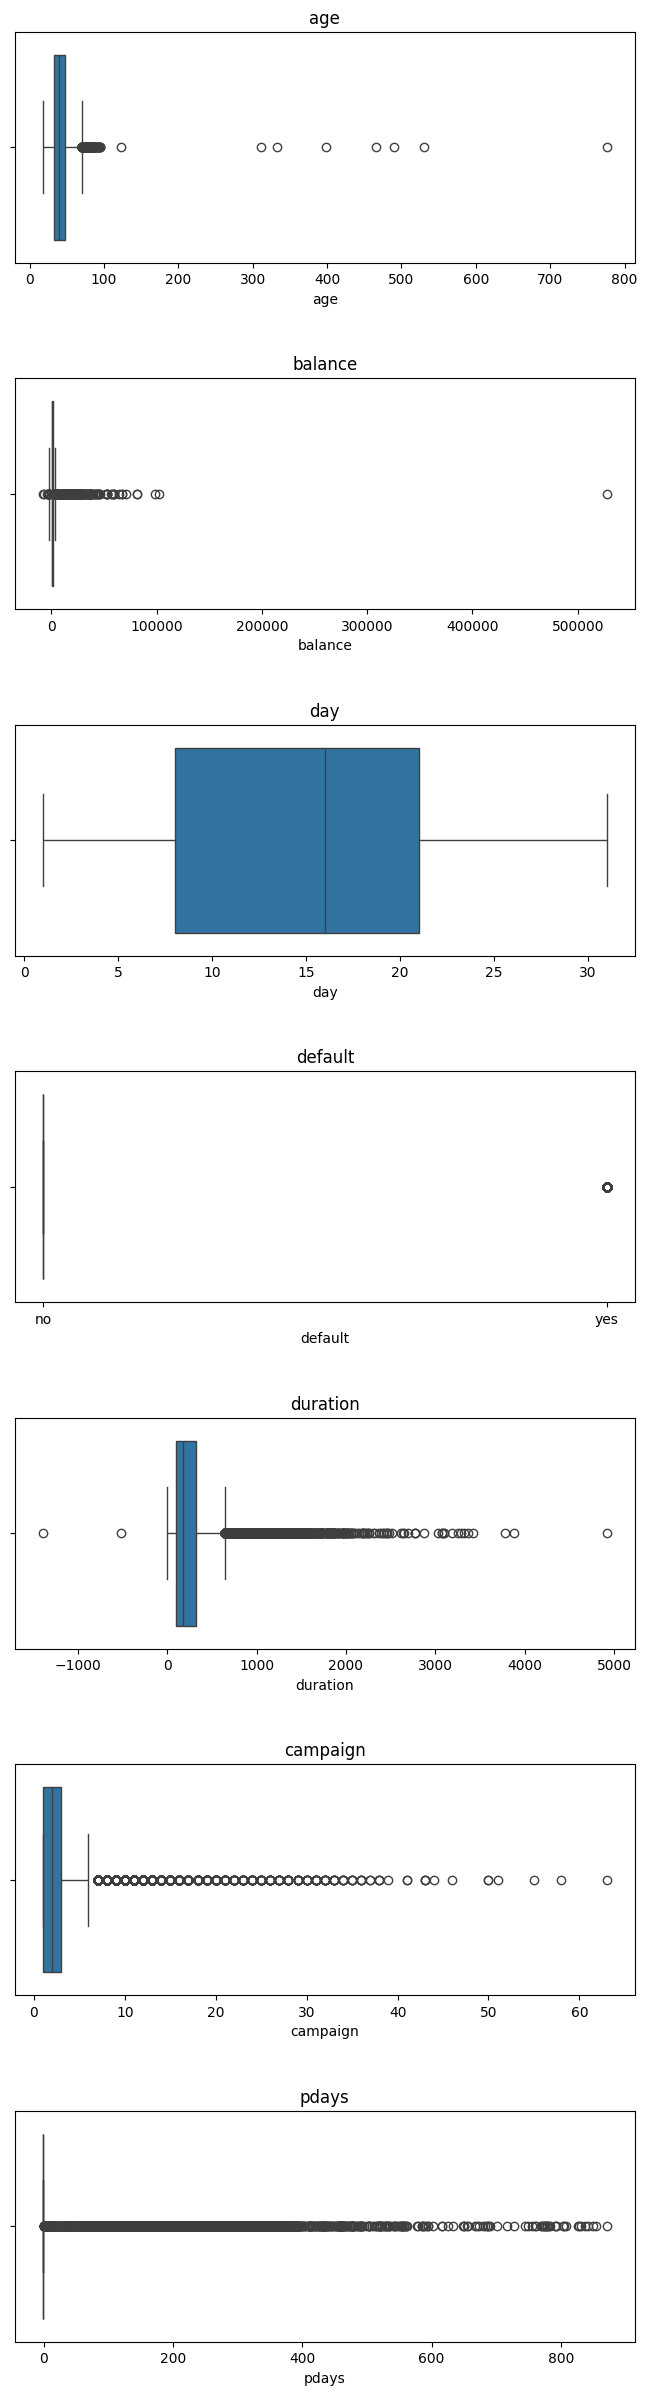

In [ ]:
cols_num = [ 'age', 'balance', 'day', 'default', 'duration', 'campaign', 'pdays', 'previous']
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30)) #crea una figura con 7 subgráficos dispuestos en una columna

fig.subplots_adjust(hspace=0.5) #ajusta el espaciado vertical entre los subgráficos

for i, col in enumerate(cols_num):
  sns.boxplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)


In [ ]:
print(f'tamaño del set antes de eliminar registros de edad: {data.shape}')
data = data[data['age']<100]
print(f'tamaño del set despues de eliminar registros de edad: {data.shape}')

tamaño del set antes de eliminar registros de edad: (45189, 17)
tamaño del set despues de eliminar registros de edad: (45189, 17)


In [ ]:
print(f'tamaño del set antes de eliminar duration: {data.shape}')
data = data[data['duration']>0]
print(f'tamaño del set despues de eliminar duration: {data.shape}')

tamaño del set antes de eliminar duration: (45195, 17)
tamaño del set despues de eliminar duration: (45190, 17)


In [ ]:
print(f'tamaño del set antes de eliminar registros de previous: {data.shape}')
data = data[data['previous']<=100]
print(f'tamaño del set despues de eliminar previous: {data.shape}')

tamaño del set antes de eliminar registros de previous: (45189, 17)
tamaño del set despues de eliminar previous: (45189, 17)
